# Assignment 2
## Pranav Kumar Kota - EE19BTECH11051

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

#### A sample material structure with domains of different $\epsilon$ adjacent to each other:

$| * * * * * | * * * | * * * | * * * * * * * | * * * * * * * * * * |$

    5pts   3pts   3pts     7pts           10pts    
    
    
---------------------------------------------------------------------------------------------------

### Theory:

    
At the interface, the electric fields are related by the boundary condition

$\Delta D = \rho_f $, where $D$ is the displacement field and $\rho_f$ is the free charge density


\begin{equation}
\implies \epsilon_i E_{i}=\epsilon_{i+1} E_{i+1} \because\ \rho_f=0
\end{equation}

The potential of the $(i+1)^{th}$ domain  $v_{i+1}$  can be written in terms of $v_i$ as:
\begin{equation}
 v_{i+1} = v_i - E_i\times \Delta h\times (n_i-1)
\end{equation}
 
 where $n_i$ is the number of points in the $i^{th}$ domain.
 
We can recursively apply this to express $E_0$ (the electric field of the first domain ) in terms of the applied boundary voltages and calculate it.
 
$v_N = v_0 - \sum_{i=0}^{N-1} \frac{\epsilon_0}{\epsilon_i}E_i(n_i-1)\Delta h$ 
 
Then, we compute the reamining fields using the displacement field boundary condition. From these, we can obtain the potential of every point in the given mesh.

In [2]:
class mesh(): # mesh class
    
    def __init__(self,numdom=0,dom_points=[],epsilons=[],dh = 1e-9): # distance between two points = dh (mesh constant)
        self.numdom=numdom
        self.dom_points=dom_points
        self.epsilons=epsilons
        self.dh = dh
    

        
    def displayMesh(self): # displays the mesh
        x_prev=0
        for i,dp in enumerate(self.dom_points):
            x = [j*dh+ x_prev for j in range(dp)]
            ONE = [1*self.epsilons[i] for k in range(len(x))]
            plt.plot(x,ONE)
            plt.scatter(x,ONE)
            plt.text((x[0]+x[-1])/2,1.02,f'D{i+1}')
            plt.axvline(x = x[0], color = 'black', label = 'axvline - full height', alpha=0.5)
            x_prev = x[-1]

        plt.axvline(x = x[-1], color = 'black', label = 'axvline - full height', alpha=0.5)
        plt.title('1D Structure')
        plt.xlabel('x (m)')
        plt.ylabel(r'$\epsilon_r$')
        plt.show()

    
    def mesh(self): # generate a mesh and return it 
        m = []
        if(len(self.dom_points)!=self.numdom):
            raise ValueError('numdom does not match size of dom_points')
        elif(len(self.epsilons)!=self.numdom):
            raise ValueError('numdom does not match size of dom_points')
        for i,n in enumerate(range(self.numdom)):
            m.append(np.zeros((self.dom_points[i])))
        return m
    
    def solveLaplace(self,boundary_voltages=[0,0],plotPotentials=False):
        
        V0=boundary_voltages[0]
        V1=boundary_voltages[1]
        def backtrack(V0,V1,dom_points=self.dom_points,epsilons=self.epsilons,dh=self.dh):   
            K = 0
            e0 = epsilons[0]
            for i,(eps_el,num_el) in enumerate(zip(epsilons,dom_points)):
                K += (num_el-1)*dh*(e0/eps_el)
            E0 = (V0-V1)/K
            E_fields = [E0]
            for i,eps_el in enumerate(epsilons):
                if(i!=0):
                    E_fields.append(e0/eps_el*E0)  
            return E_fields

        def compute_potentials(V0,V1,E_fields,dom_points=self.dom_points,dh=self.dh):
            Vs = [[] for n in dom_points]
            v_prev = V0
            for i,(d,n) in enumerate(zip(Vs,dom_points)):
                for j in range(n):
                    Vs[i].append(v_prev - E_fields[i]*dh*j)
                v_prev = Vs[i][-1]
            return Vs
        
        E_fields = backtrack(V0,V1)
        Vs = compute_potentials(V0,V1,E_fields)
        
        if(plotPotentials==True):
            x_prev=0
            for i,v in enumerate(Vs):
                x = [j*dh+ x_prev for j in range(dom_points[i])]
                plt.plot(x,v)
                plt.scatter(x,v)
                x_prev = x[-1]
            plt.title(f'Potential variation of the input structure for the applied bias : {V0-V1} V -> Edges = {V0,V1}')
            plt.xlabel('x (m)')
            plt.ylabel('V')
            plt.show()
                
        self.mesh = Vs
    

### Solving the Laplace equation and displaying the potential variation for a sample structure and applied bias

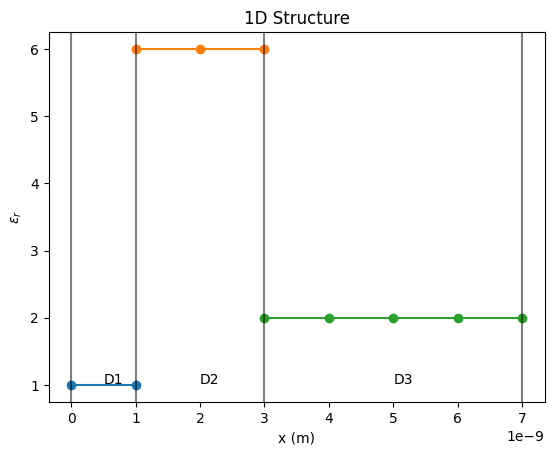

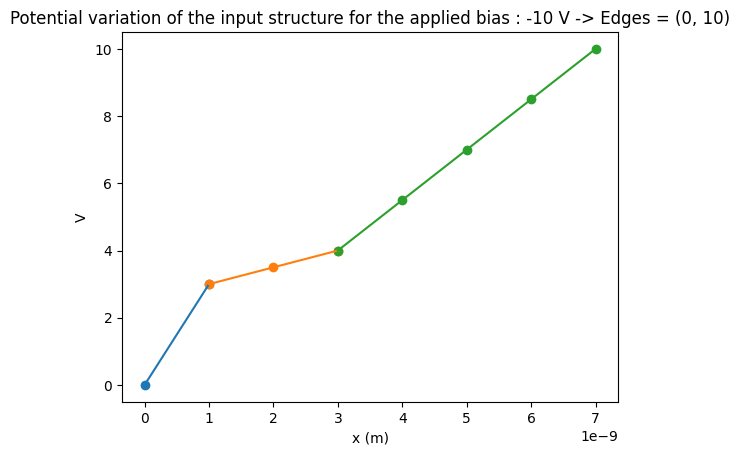

The potentials are:  [[0.0, 3.0], [3.0, 3.5, 4.0], [4.0, 5.5, 7.0, 8.5, 10.0]]


In [4]:
numdom=3 # number of domains in the structure
dom_points = [2,3,5] # points per domain
epsilons = [1,6,2] # relative permittivities of each domain
dh = 1e-9 # mesh constant
mesh_ = mesh(numdom=numdom, dom_points=dom_points, epsilons=epsilons, dh=dh) # defining a sample mesh using the above parameters
mesh_a = mesh_.mesh()
mesh_.displayMesh()
mesh_a = mesh_.solveLaplace([0,10],plotPotentials=True) # solve the laplace equation for the mesh and update the mesh object
print('The potentials are: ',mesh_.mesh)